# Stock Time Series Analysis

Based on using the **adjusted** close prices for FB, MMM, IBM and AMZN for the last 60 months. Data downloaded from Yahoo Finance. 

## Downloading Stock Prices

In [2]:
# all imports and env variables
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import datetime
import pandas_datareader.data as web
from pandas.plotting import autocorrelation_plot, scatter_matrix
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(8, 5))

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

In [3]:
start = datetime.datetime(2016, 7, 12)
end = datetime.datetime(2021, 7, 12)

In [4]:
import yfinance as yf
from pandas_datareader import data as pdr

# 1) Using pandas datareader and Yahoo Finance
yf.pdr_override()

amzn = pdr.get_data_yahoo('AMZN', start = start)


[*********************100%***********************]  1 of 1 completed


In [6]:
# download multipe stocks into a single dataframe:

all_stocks_list = ['AMZN', 'FB', 'MMM', 'IBM']
all_stocks = yf.download(all_stocks_list, start = start)

[*********************100%***********************]  4 of 4 completed


In [8]:
all_stocks.head()

Adj Close                                           Close  \
                  AMZN          FB         IBM         MMM        AMZN   
Date                                                                     
2016-07-12  748.210022  117.930000  125.741653  154.631622  748.210022   
2016-07-13  742.630005  116.779999  126.526306  154.674789  742.630005   
2016-07-14  741.200012  117.290001  128.335892  156.133362  741.200012   
2016-07-15  735.440002  116.860001  127.935547  156.564941  735.440002   
2016-07-18  736.070007  119.370003  127.999588  156.314636  736.070007   

                                                      High              ...  \
                    FB         IBM         MMM        AMZN          FB  ...   
Date                                                                    ...   
2016-07-12  117.930000  157.039993  179.160004  757.340027  118.720001  ...   
2016-07-13  116.779999  158.020004  179.210007  756.869995  118.400002  ...   
2016-07-14  117.290001  160.279999  180.899994  749.039978  117.639999  ...   
2016-07-15  116.860001  159.779999  181.399994  746.549988  118.279999  ...   
2016-07-18  119.370003  159.860001  181.110001  741.599976  119.610001  ...   

                   Low                    Open                          \
                   IBM         MMM        AMZN          FB         IBM   
Date                                                                     
2016-07-12  155.520004  178.029999  756.859985  118.629997  156.000000   
2016-07-13  157.059998  178.690002  746.760010  118.389999  157.750000   
2016-07-14  158.580002  179.880005  748.859985  117.500000  158.809998   
2016-07-15  158.500000  180.559998  746.549988  117.739998  159.899994   
2016-07-18  158.729996  180.750000  735.489990  117.320000  159.300003   

                         Volume                              
                   MMM     AMZN        FB      IBM      MMM  
Date                                                         
2016-07-12  178.750000  5623700  15217700  3843800  1912900  
2016-07-13  179.220001  4142300  16207700  2746400  1491500  
2016-07-14  180.149994  2390500  14579700  4637600  1904300  
2016-07-15  181.500000  3121400  16646000  4476800  2475200  
2016-07-18  181.440002  2954900  20868400  6729700  1224400  

[5 rows x 24 columns]

In [9]:
stocks_adj = pd.DataFrame(all_stocks.iloc[:,:4])

In [10]:
stocks_adj.head()

Adj Close                                    
                  AMZN          FB         IBM         MMM
Date                                                      
2016-07-12  748.210022  117.930000  125.741653  154.631622
2016-07-13  742.630005  116.779999  126.526306  154.674789
2016-07-14  741.200012  117.290001  128.335892  156.133362
2016-07-15  735.440002  116.860001  127.935547  156.564941
2016-07-18  736.070007  119.370003  127.999588  156.314636

In [11]:
#making sure no null values
stocks_adj.isnull().values.any()

False

In [12]:
#resampling to the last day of a business month
stocks_adj = stocks_adj.resample('BM').last()
stocks_adj

Adj Close                                    
                   AMZN          FB         IBM         MMM
Date                                                       
2016-07-29   758.809998  123.940002  128.608139  153.941116
2016-08-31   769.159973  126.120003  128.313599  155.664581
2016-09-30   837.309998  128.270004  128.289398  153.050507
2016-10-31   789.820007  130.990005  124.122078  143.558121
2016-11-30   750.570007  118.419998  132.199585  150.107330
...                 ...         ...         ...         ...
2021-03-31  3094.080078  294.529999  131.787506  191.272461
2021-04-30  3467.419922  325.079987  140.312271  195.699890
2021-05-31  3223.070068  328.730011  143.740005  203.039993
2021-06-30  3440.159912  347.709991  146.589996  198.630005
2021-07-30  3713.895020  352.903015  140.889999  199.759995

[61 rows x 4 columns]

In [13]:
#remove the additional index, so that it's easier to index
stocks_adj.columns = stocks_adj.columns.droplevel(0)

In [14]:
stocks_adj

,AMZN,FB,IBM,MMM
Date,,,,
2016-07-29,758.809998,123.940002,128.608139,153.941116
2016-08-31,769.159973,126.120003,128.313599,155.664581
2016-09-30,837.309998,128.270004,128.289398,153.050507
2016-10-31,789.820007,130.990005,124.122078,143.558121
2016-11-30,750.570007,118.419998,132.199585,150.107330
...,...,...,...,...
2021-03-31,3094.080078,294.529999,131.787506,191.272461
2021-04-30,3467.419922,325.079987,140.312271,195.699890
2021-05-31,3223.070068,328.730011,143.740005,203.039993


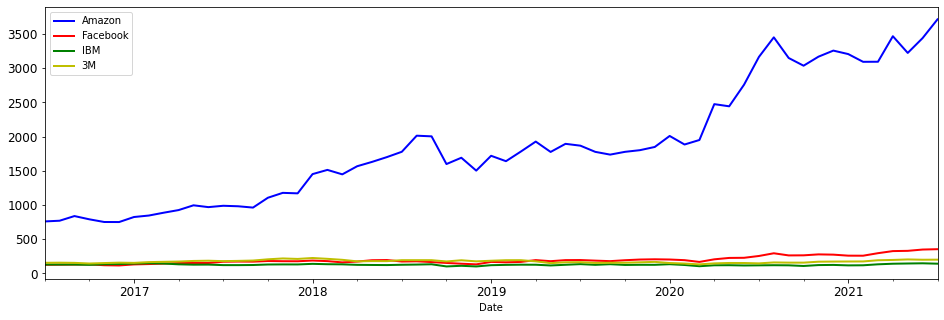

In [15]:
#we'll plot the data to see trends
colors = ['b', 'r', 'g', 'y']
ax = stocks_adj.plot(linewidth=2, fontsize=12, figsize = (16,5),color = colors);
ax.legend(['Amazon','Facebook','IBM','3M']);

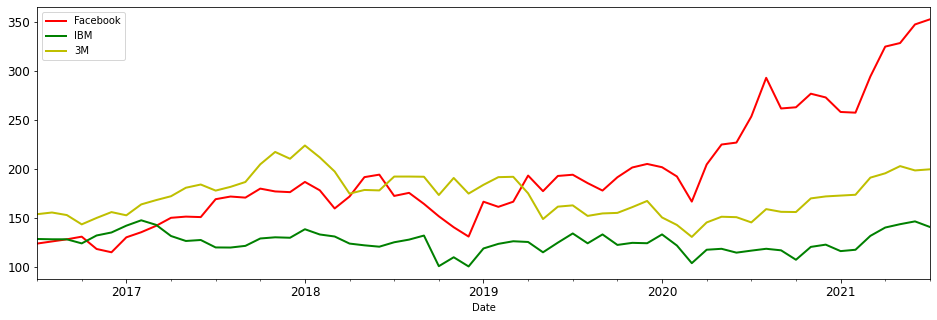

In [16]:
#as Amazon stock is significantly more expensive than anything else, we'll plot the other three separately:
ax = stocks_adj.iloc[:,1:].plot(linewidth=2, fontsize=12, figsize = (16,5), color  = colors[1:])
ax.legend(['Facebook','IBM','3M']);

### Based on these plots, Amazon stock has been steadily growing, and jumped in 2020 when people were forced to use online shopping during the pandemic. Facebook stock price has also increased significantly since the first quarter of 2020. 3M stock price has seen a constatnt ddecrease from 2018 to the first quarter of 2020, where it started to pick up again, probably due to the increased demand for PPE they produce.IBM stock has been more or less stable throughout the years, currently we can see an increasing trend.

Text(0.5, 1.0, 'Amazon Autocorrelation')

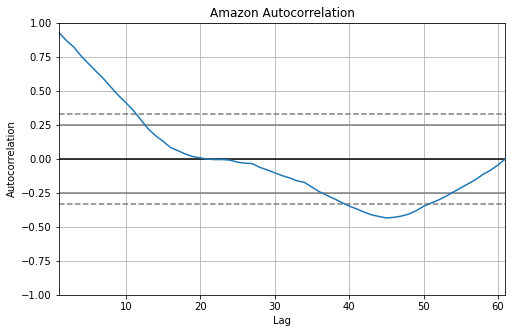

In [17]:
autocorrelation_plot(stocks_adj['AMZN'])
plt.title('Amazon Autocorrelation')

#For amazon stocks, there is a little positive correlation until about a year, which then becomes statistically 
#insignificant, there's less than 0.5 negative correlation between the lags of 40 a.nd 50

Text(0.5, 1.0, 'Facebook Autocorrelation')

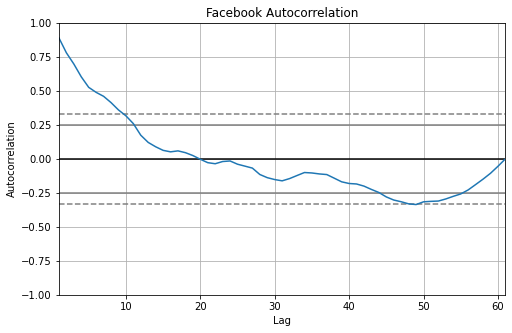

In [18]:
autocorrelation_plot(stocks_adj['FB'])
plt.title('Facebook Autocorrelation')
#There is positive correlation up until 10 months, which then becomes statistically insignificant

Text(0.5, 1.0, 'IBM Autocorrelation')

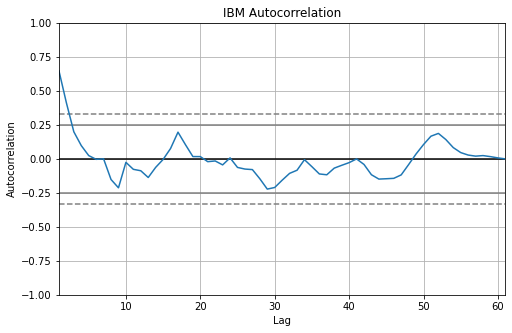

In [19]:
autocorrelation_plot(stocks_adj['IBM'])
plt.title('IBM Autocorrelation')
#we can say there is almost no autocorrelation here. It almost immediately drops to statistically insignificant.

Text(0.5, 1.0, '3M Autocorrelation')

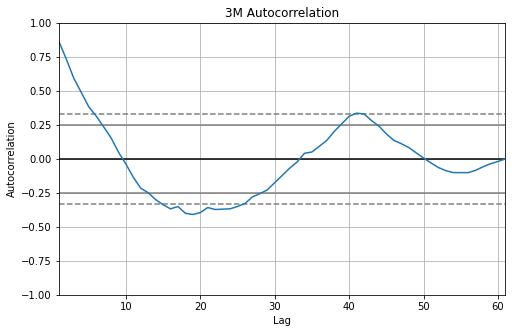

In [20]:
autocorrelation_plot(stocks_adj['MMM'])
plt.title('3M Autocorrelation')
#positive correlation until about 5 lags, then - statistically insignificant, 
#and minor negative correlation between lags of 15 and 25

In [21]:
#To calculate returns 
amzn_returns = pd.Series((stocks_adj['AMZN'] / stocks_adj['AMZN'].shift(1) - 1)*100)
amzn_returns
#understandably,our first value is NaN, as there is nothing to subtract from it, we'll need to fix it

Date
2016-07-29          NaN
2016-08-31     1.363975
2016-09-30     8.860319
2016-10-31    -5.671733
2016-11-30    -4.969487
                ...    
2021-03-31     0.037186
2021-04-30    12.066263
2021-05-31    -7.047022
2021-06-30     6.735499
2021-07-30     7.957046
Freq: BM, Name: AMZN, Length: 61, dtype: float64

In [22]:
#Just to doublecheck we only have one NaN:
amzn_returns.isnull().sum()

1

In [23]:
amzn_returns = amzn_returns.dropna()
amzn_returns.isnull().sum()

0

Text(0.5, 1.0, 'Amazon Returns Autocorrelation')

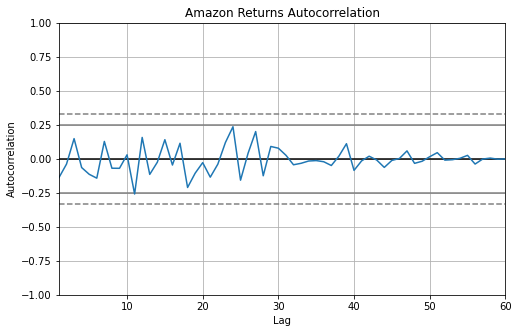

In [24]:
pd.plotting.autocorrelation_plot(amzn_returns)
plt.title('Amazon Returns Autocorrelation')

In [25]:
fb_returns = pd.Series((stocks_adj['FB'] / stocks_adj['FB'].shift(1) - 1)*100)
fb_returns = fb_returns.dropna()
fb_returns.isnull().sum()

0

Text(0.5, 1.0, 'Facebook Returns Autocorrelation')

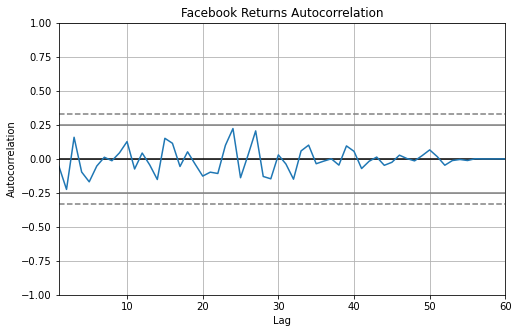

In [26]:
pd.plotting.autocorrelation_plot(fb_returns)
plt.title('Facebook Returns Autocorrelation')

In [27]:
ibm_returns = (stocks_adj['IBM'] / stocks_adj['IBM'].shift(1) - 1)*100
ibm_returns = ibm_returns.dropna()
ibm_returns.isnull().sum()


0

Text(0.5, 1.0, 'IBM Autocorrelation')

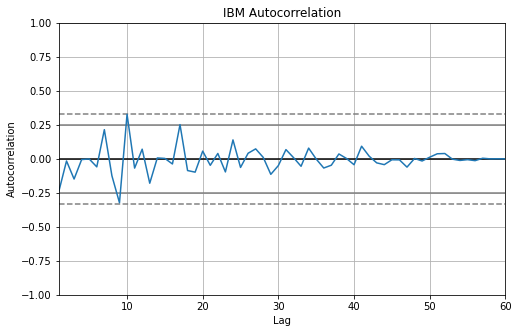

In [28]:
autocorrelation_plot(ibm_returns)
plt.title('IBM Autocorrelation')

In [29]:
mmm_returns = pd.Series((stocks_adj['MMM'] / stocks_adj['MMM'].shift(1) - 1)*100)
mmm_returns = mmm_returns.dropna()
mmm_returns.isnull().sum()

0

Text(0.5, 1.0, '3M Autocorrelation')

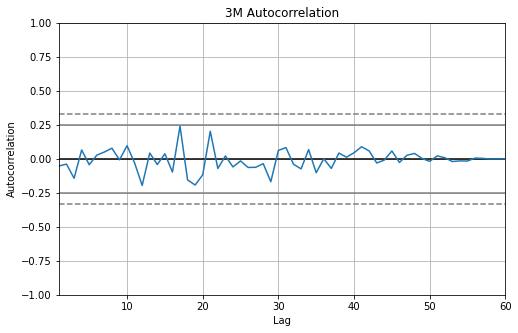

In [30]:
autocorrelation_plot(mmm_returns)
plt.title('3M Autocorrelation')

Based on the above graphs, returns are not atocorrelated for any of the companies in question. All values are within the dashed lines (not statistically significant). They could be classified as white noise.

In [31]:
all_returns = [amzn_returns, fb_returns,ibm_returns,mmm_returns]
comb_returns = pd.concat(all_returns, axis = 1)
comb_returns.head()

,AMZN,FB,IBM,MMM
Date,,,,
2016-08-31,1.363975,1.758916,-0.229022,1.119561
2016-09-30,8.860319,1.704727,-0.018860,-1.679300
2016-10-31,-5.671733,2.120528,-3.248375,-6.202126
2016-11-30,-4.969487,-9.596158,6.507712,4.562061
2016-12-30,-0.093264,-2.845799,2.323995,3.976952


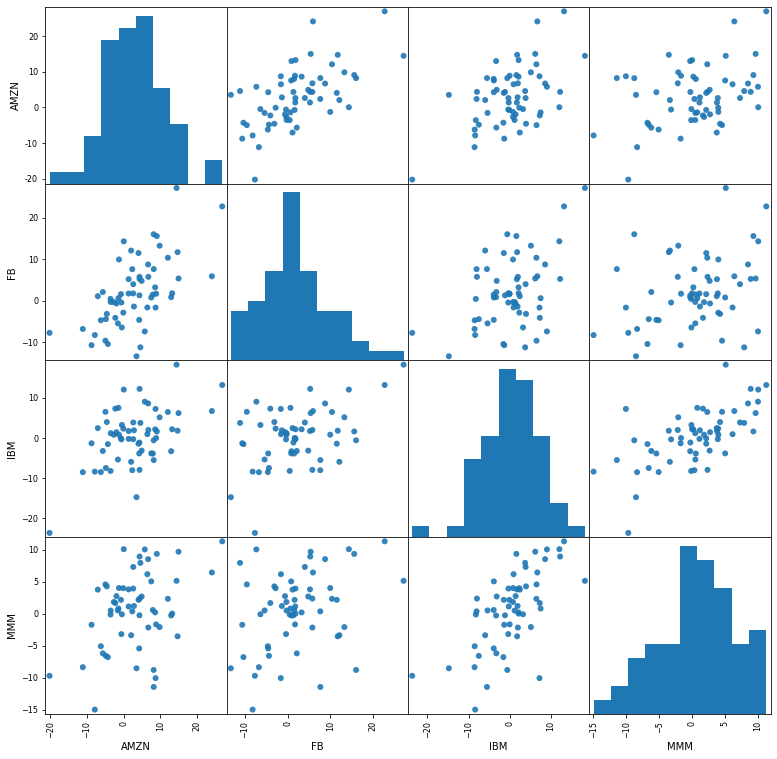

In [47]:
scatter_matrix(comb_returns, figsize = (13,13), alpha = 0.9, marker = 'o', label = labels );


### We can conclude from these plots that overall, there is a positive correlation between different companies' stocks, which makes sense as usually stocks grow overtime. This is less applicable to Facebook stock. When we plot it with other complanies, the correlation isn't that strong. it is especially evident when plotting 3M and Facebook stocks against each other. There is almost no correlation there. 
### The strongest positive correlation is betewen pairs: Amazon-Facebook, IBM-3M